In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
#With discharge
file_path = r"y_obs.csv"
y_obs = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_obs.set_index(y_obs.columns[0],inplace=True)
file_path = r'y_sim.csv'
y_sim = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim.set_index(y_sim.columns[0],inplace=True)

In [3]:
#Updated NSE Calculations
import pandas as pd
import numpy as np

def calculate_nse(y_obs_df, y_sim_df):
    """Calculate NSE for each catchment while handling NaN values."""
    nse_values = []

    for catchment in y_obs_df.columns:
        # Read values
        y_obs = y_obs_df[catchment].values
        y_sim = y_sim_df[catchment].values

        # Mask NaN values from y_sim
        mask_y_sim = ~np.isnan(y_sim)
        y_sim = y_sim[mask_y_sim]
        y_obs = y_obs[mask_y_sim]

        # Mask NaN values from y_obs
        mask_y_obs = ~np.isnan(y_obs)
        y_sim = y_sim[mask_y_obs]
        y_obs = y_obs[mask_y_obs]

        # Calculate NSE
        if y_sim.size > 180 and y_obs.size > 180:
            nse = 1.0 - np.sum((y_sim - y_obs)**2) / np.sum((y_obs - np.mean(y_obs))**2)
            nse = round(nse, 3)  # Round to two decimals
        else:
            nse = np.nan

        nse_values.append(nse)

    return pd.DataFrame({'Catchment': y_obs_df.columns, 'NSE': nse_values})


In [4]:
nse_df = calculate_nse(y_obs, y_sim)

# Save to CSV
nse_df.to_csv('nse_results_discharge.csv', index=False)

In [5]:
nse_df_pmean = nse_df
file_path = r"C:\Users\ashis\Github\lstm_backward\results\with_discharge\nse_results_discharge.csv"
nse_df = pd.read_csv(file_path)

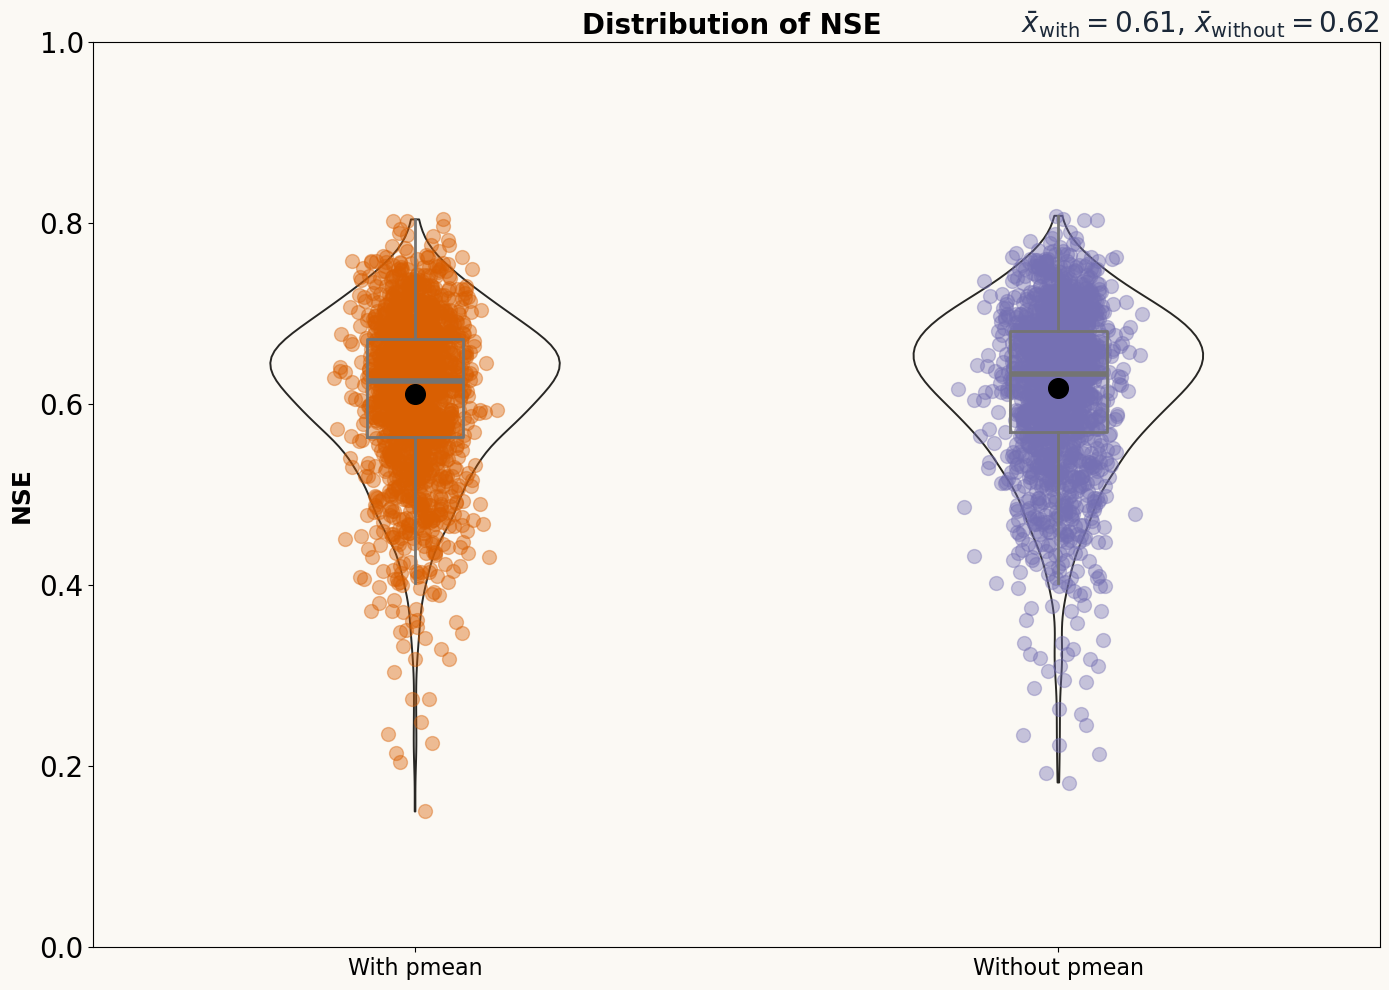

In [6]:
#Updated Plots
# Define colors and layout constants
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"
POSITIONS = [1, 2]  # Positions for the violin plots
HLINES = np.arange(-0.5, 1.1, 0.1)  # Horizontal lines for reference

nse_disch_values = nse_df['NSE'].dropna()
nse_without_disch_values = nse_df_pmean ['NSE'].dropna()

# Data for plotting
y_data = [nse_disch_values, nse_without_disch_values]
x_jittered = [np.random.normal(pos, 0.04, size=len(y)) for pos, y in zip(POSITIONS, y_data)]

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = [ "#D95F02", "#7570B3"]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)


# Add violins
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

# Add boxplots
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers=False,  # Do not show the outliers beyond the caps
    showcaps=False,    # Do not show the caps
    medianprops=medianprops,
    whiskerprops=boxprops,
    boxprops=boxprops
)

# Add jittered dots
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s=100, color=color, alpha=0.4)

# Calculate and plot the mean
means = [np.mean(y) for y in y_data]

# Plot the means as red circles
ax.scatter(POSITIONS, means, color='black', s=200, zorder=3, label='Mean')


# Customize labels
ax.set_xticks(POSITIONS)
ax.tick_params(axis='both', labelsize=20)
ax.set_xticklabels(['With pmean', 'Without pmean'], size=16)
ax.set_ylabel('NSE', size=18, weight='bold')
ax.set_ylim([0,1])
ax.set_title('Distribution of NSE ', size=20, weight='bold')

# Subtitle
subtitle_stats = [
    r"$\bar{x}_{\rm{with}}=%.2f$" % np.mean(nse_disch_values),
    r"$\bar{x}_{\rm{without}}=%.2f$" % np.mean(nse_without_disch_values)
]

ax.set_title(
    ", ".join(subtitle_stats),
    loc="right",
    ha="right",
    fontsize=20,
    color=BLUE_DARK
)

# Adjust layout
plt.tight_layout()
plt.savefig('violin_plot.jpeg', dpi =1200)
plt.show()

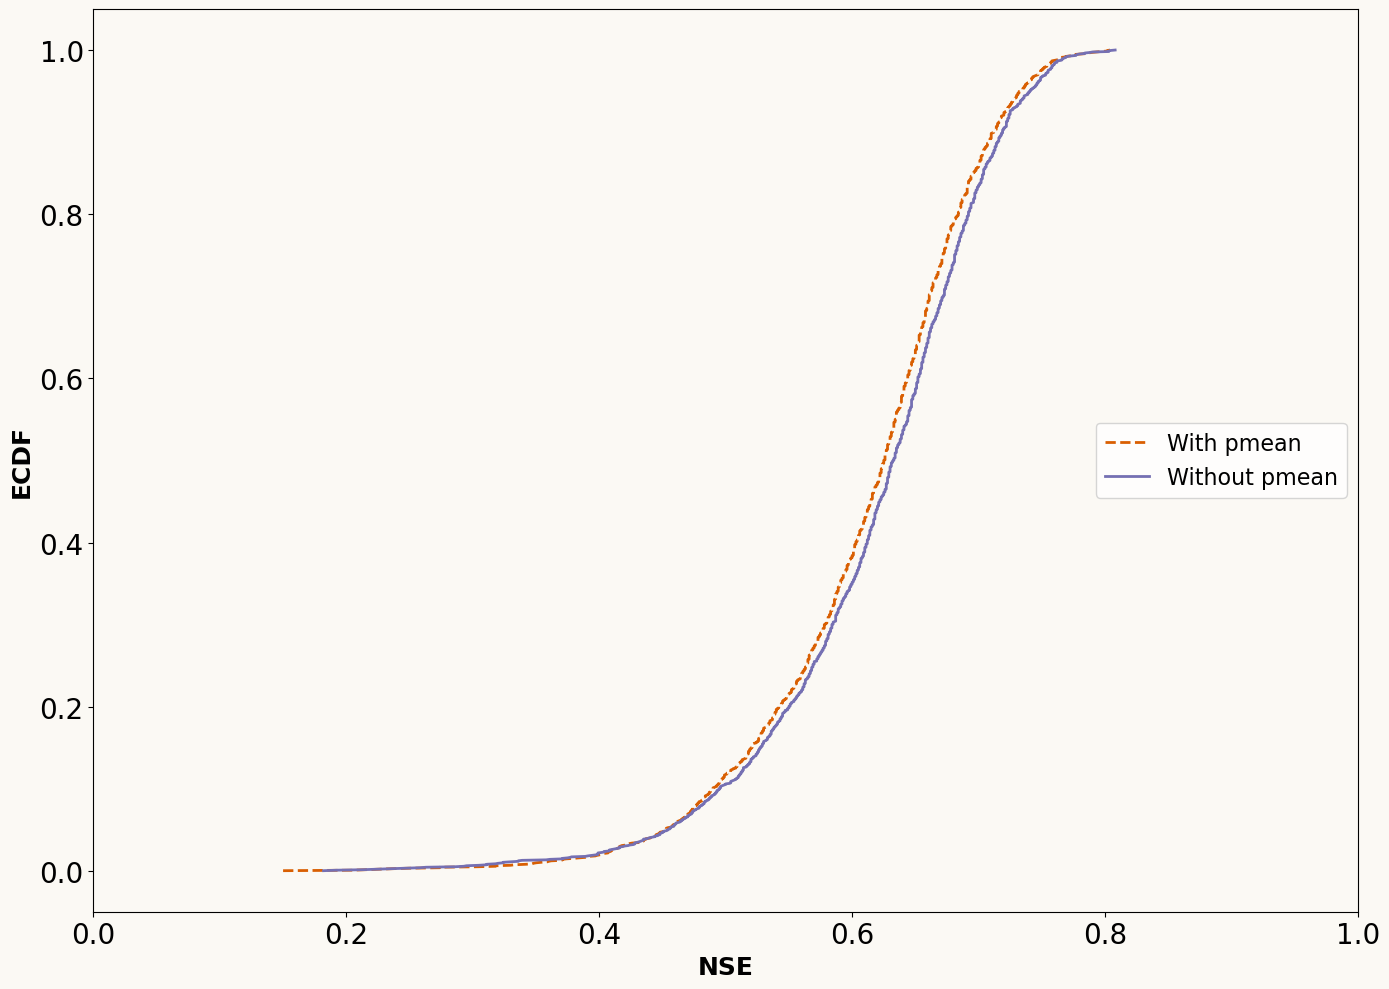

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

# Define colors and layout constants
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

COLOR_SCALE = [ "#D95F02", "#7570B3"]


nse_disch_values = nse_df['NSE'].dropna()
nse_without_disch_values = nse_df_pmean ['NSE'].dropna()

# Calculate the ECDF using statsmodels
ecdf_disch = ECDF(nse_disch_values)
ecdf_without_disch = ECDF(nse_without_disch_values)

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)


# Plot ECDF for nse_disch
ax.plot(ecdf_disch.x, ecdf_disch.y, label='With pmean', color="#D95F02", lw=2,linestyle='dashed')

# Plot ECDF for nse_without_disch
ax.plot(ecdf_without_disch.x, ecdf_without_disch.y, label='Without pmean', color="#7570B3", lw=2)

# Add labels and legend
ax.set_xlabel('NSE', size=18, weight='bold')
ax.tick_params(axis='both', labelsize=16)
ax.set_xlim([0, 1])  # Limit x-axis to range 0 to 1
ax.set_ylabel('ECDF', size=18, weight='bold')
ax.legend(loc='center right', fontsize=16)

# Increase the font size of the ticks
ax.tick_params(axis='both', which='major', labelsize=20)  # Set font size for both axes

# Adjust layout
# Adjust layout
plt.tight_layout()
plt.savefig('ecdf_plot.jpeg', dpi =1200)
plt.show()




In [ ]:
# Assuming nse_without_disch and nse_disch are your input dataframes
# Merge the two dataframes on 'basin_id'
merged_df = pd.merge(nse_df_disch, nse_df, on='Catchment', suffixes=('_without_disch', '_disch'))

# Calculate the difference between the two NSE columns
merged_df['NSE_difference'] =  merged_df['NSE_disch'] - merged_df['NSE_without_disch'] 

# Display the result
print(merged_df)

           Catchment  NSE_without_disch  NSE_disch  NSE_difference
0       GRDC_6140100              0.465      0.620           0.155
1       GRDC_6140101              0.465      0.638           0.173
2       GRDC_6140120              0.475      0.631           0.156
3       GRDC_6140130              0.403      0.583           0.180
4       GRDC_6140140              0.422      0.593           0.171
...              ...                ...        ...             ...
1799  camelsgb_95001              0.302      0.578           0.276
1800  camelsgb_96001              0.266      0.587           0.321
1801  camelsgb_96002              0.253      0.611           0.358
1802  camelsgb_96004              0.264      0.573           0.309
1803  camelsgb_97002              0.304      0.559           0.255

[1804 rows x 4 columns]


In [35]:
merged_df.to_csv("result_NSE_differences.csv")

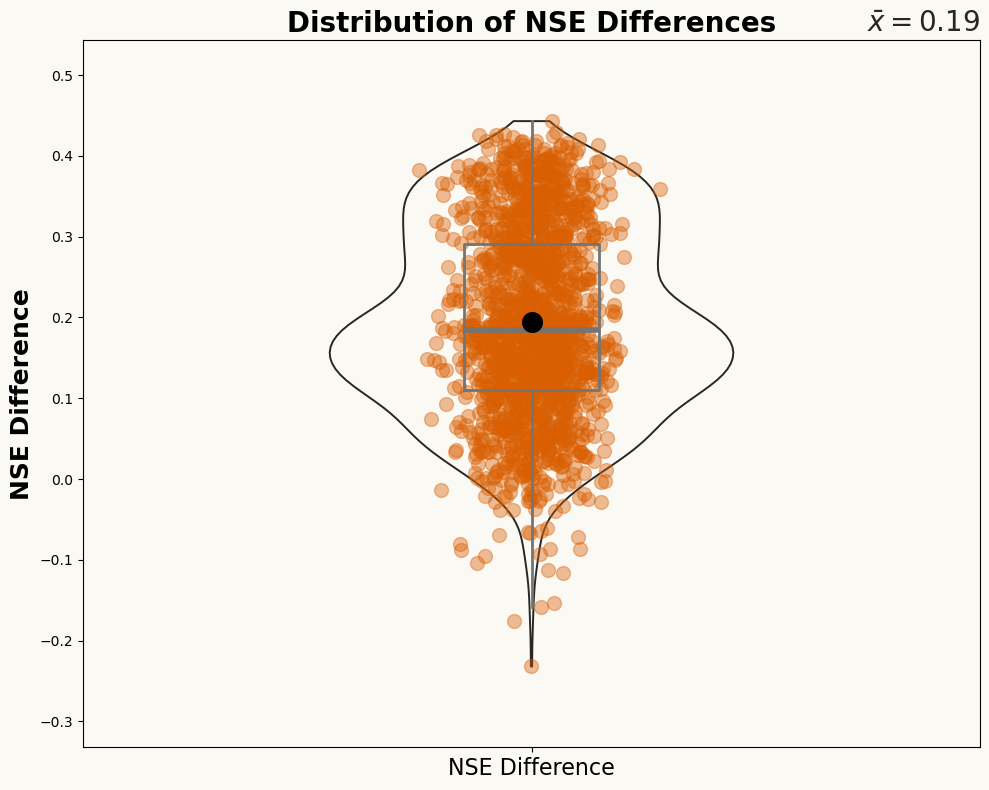

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors and layout constants
BG_WHITE = "#fbf9f4"
GREY_DARK = "#747473"
BLACK = "#282724"
COLOR_SCALE = ["#D95F02"]  # Single color for one distribution
POSITION = [1]  # Single violin plot position
HLINES = np.arange(-0.5, 1.1, 0.1)  # Horizontal reference lines

# Extract data
nse_difference = merged_df['NSE_difference'].dropna()

# Jitter for scatter points
x_jittered = np.random.normal(POSITION[0], 0.04, size=len(nse_difference))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Violin plot
violins = ax.violinplot(
    [nse_difference],  # Single dataset
    positions=POSITION,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violin appearance
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

# Boxplot (optional)
medianprops = dict(linewidth=4, color=GREY_DARK, solid_capstyle="butt")
boxprops = dict(linewidth=2, color=GREY_DARK)

ax.boxplot(
    [nse_difference],
    positions=POSITION, 
    showfliers=False, 
    showcaps=False, 
    medianprops=medianprops,
    whiskerprops=boxprops,
    boxprops=boxprops
)

# Scatter points
ax.scatter(x_jittered, nse_difference, s=100, color=COLOR_SCALE[0], alpha=0.4)

# Mean value
mean_value = np.mean(nse_difference)
ax.scatter(POSITION, [mean_value], color='black', s=200, zorder=3, label='Mean')

# Labels & Titles
ax.set_xticks(POSITION)
ax.set_xticklabels(['NSE Difference'], size=16)
ax.set_ylabel('NSE Difference', size=18, weight='bold')
ax.set_ylim([min(nse_difference) - 0.1, max(nse_difference) + 0.1])
ax.set_title('Distribution of NSE Differences', size=20, weight='bold')

# Subtitle with mean value
subtitle_text = r"$\bar{x} = %.2f$" % mean_value
ax.set_title(subtitle_text, loc="right", ha="right", fontsize=20, color=BLACK)

# Adjust layout & save
plt.tight_layout()
plt.savefig('violin_plot_nse_difference.jpeg', dpi=1200)
plt.show()


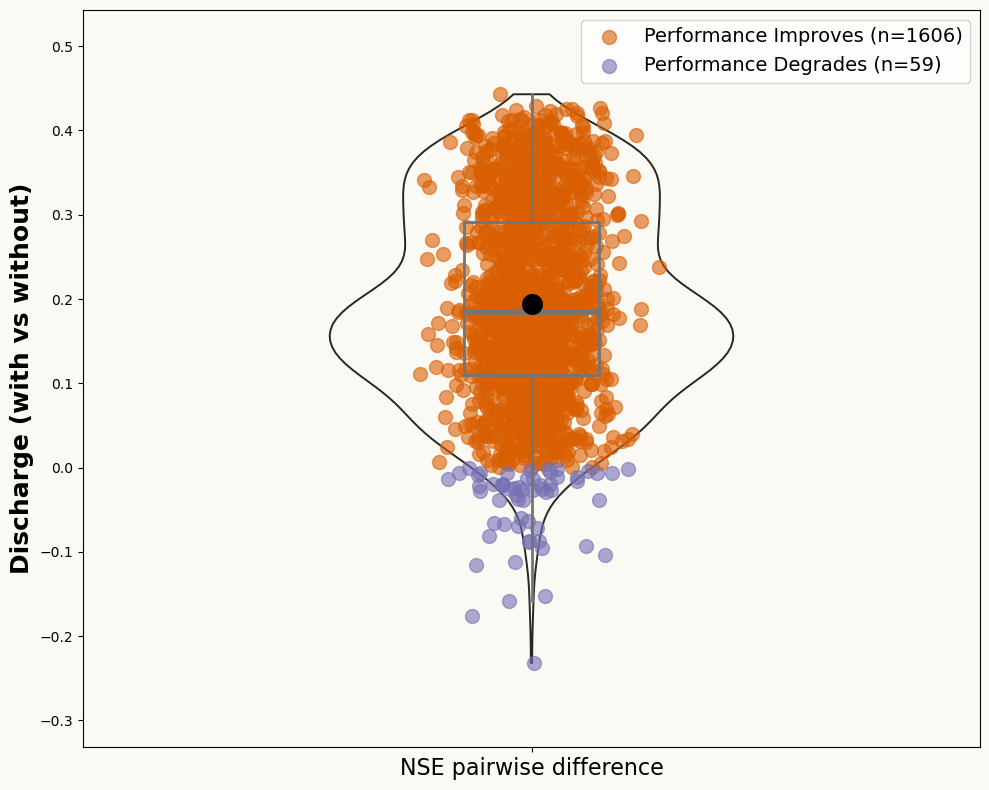

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors and layout constants
BG_WHITE = "#fbf9f4"
GREY_DARK = "#747473"
BLACK = "#282724"
COLOR_POSITIVE = "#D95F02" 
COLOR_NEGATIVE = "#7570B3" 
POSITION = [1]  # Single violin plot position


# Extract data
nse_difference = merged_df['NSE_difference'].dropna()

# Split data into positive and negative
positive_values = nse_difference[nse_difference >= 0]
negative_values = nse_difference[nse_difference < 0]
# Count the number of points in each category
num_positive = len(positive_values)
num_negative = len(negative_values)


# Generate jittered x-values for each group
x_jittered_positive = np.random.normal(POSITION[0], 0.04, size=len(positive_values))
x_jittered_negative = np.random.normal(POSITION[0], 0.04, size=len(negative_values))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Violin plot
violins = ax.violinplot(
    [nse_difference],  
    positions=POSITION,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violin appearance
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

# Boxplot (optional)
medianprops = dict(linewidth=4, color=GREY_DARK, solid_capstyle="butt")
boxprops = dict(linewidth=2, color=GREY_DARK)

ax.boxplot(
    [nse_difference],
    positions=POSITION, 
    showfliers=False, 
    showcaps=False, 
    medianprops=medianprops,
    whiskerprops=boxprops,
    boxprops=boxprops
)

# Scatter points with color distinction
ax.scatter(x_jittered_positive, positive_values, s=100, color=COLOR_POSITIVE, alpha=0.6, label=f"Performance Improves (n={num_positive})") 
ax.scatter(x_jittered_negative, negative_values, s=100, color=COLOR_NEGATIVE, alpha=0.6, label=f"Performance Degrades (n={num_negative})")

# Mean value
mean_value = np.mean(nse_difference)
ax.scatter(POSITION, [mean_value], color='black', s=200, zorder=3)

# Labels & Titles
ax.set_xticks(POSITION)
ax.set_xticklabels(['NSE pairwise difference'], size=16)
ax.set_ylabel('Discharge (with vs without)', size=18, weight='bold')
ax.set_ylim([min(nse_difference) - 0.1, max(nse_difference) + 0.1])


# Add legend
ax.legend(loc="upper right", fontsize=14)

# Adjust layout & save
plt.tight_layout()
plt.savefig('violin_plot_nse_difference_colored.jpeg', dpi=1200)
plt.show()
